In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


%matplotlib inline

In [2]:
#Importing the data frame as df
df = pd.read_csv('./EOD-HD.csv')

In [10]:
df.shape

(9418, 13)

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2019-01-28,178.97,179.9900,177.4100,179.83,4047742.0,0.0,1.0,178.97,179.9900,177.4100,179.83,4047742.0
1,2019-01-25,179.78,180.8700,178.6100,180.40,4502516.0,0.0,1.0,179.78,180.8700,178.6100,180.40,4502516.0
2,2019-01-24,177.00,177.5300,175.3000,177.29,3860309.0,0.0,1.0,177.00,177.5300,175.3000,177.29,3860309.0
3,2019-01-23,176.59,178.0600,174.5300,176.89,4910402.0,0.0,1.0,176.59,178.0600,174.5300,176.89,4910402.0
4,2019-01-22,177.49,178.6048,175.3626,177.11,6272715.0,0.0,1.0,177.49,178.6048,175.3626,177.11,6272715.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
9413,1981-09-28,10.25,10.25,10.25,10.25,16957.0,0.0,1.0,0.019965,0.019965,0.019965,0.019965,5.794525e+06
9414,1981-09-25,10.25,10.25,10.25,10.25,21382.0,0.0,1.0,0.019965,0.019965,0.019965,0.019965,7.306630e+06
9415,1981-09-24,10.25,10.25,10.25,10.25,14824.0,0.0,1.0,0.019965,0.019965,0.019965,0.019965,5.065639e+06
9416,1981-09-23,10.25,10.25,10.25,10.25,21597.0,0.0,1.0,0.019965,0.019965,0.019965,0.019965,7.380100e+06
9417,1981-09-22,10.25,10.25,10.25,10.25,21760.0,0.0,1.0,0.019965,0.019965,0.019965,0.019965,7.435800e+06


In [5]:
#Setting date as our Index column
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,,
2019-01-28,2019-01-28,178.97,179.9900,177.4100,179.83,4047742.0,0.0,1.0,178.97,179.9900,177.4100,179.83,4047742.0
2019-01-25,2019-01-25,179.78,180.8700,178.6100,180.40,4502516.0,0.0,1.0,179.78,180.8700,178.6100,180.40,4502516.0
2019-01-24,2019-01-24,177.00,177.5300,175.3000,177.29,3860309.0,0.0,1.0,177.00,177.5300,175.3000,177.29,3860309.0
2019-01-23,2019-01-23,176.59,178.0600,174.5300,176.89,4910402.0,0.0,1.0,176.59,178.0600,174.5300,176.89,4910402.0
2019-01-22,2019-01-22,177.49,178.6048,175.3626,177.11,6272715.0,0.0,1.0,177.49,178.6048,175.3626,177.11,6272715.0


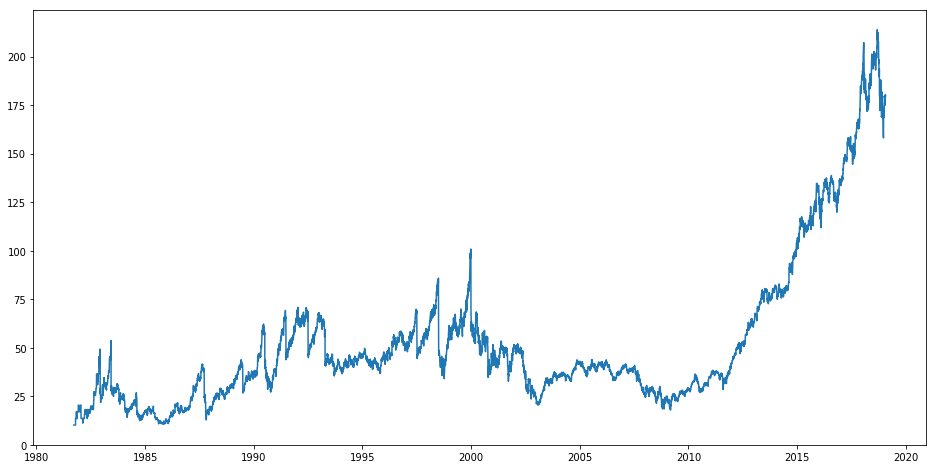

In [7]:
#Initial shape representation of our close price
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [9]:
#creating dataframe with date and the target variable to 
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

##LSTM

In [13]:
#Sorting values
data = df.sort_index(ascending=True, axis=0)
#creating a new data frame to avoid any affect to the past features
data_1 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    data_1['Date'][i] = data['Date'][i]
    data_1['Close'][i] = data['Close'][i]


In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4709,:]
valid = dataset[4709:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(50,len(train)):
    x_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10))
model.add(Dense(1))
#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=1)

#predicting values, using past 50 from the train data
inputs = new_data[len(new_data) - len(valid) - 50:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(50,inputs.shape[0]):
    X_test.append(inputs[i-50:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [27]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.562737455621065

/Users/Sam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


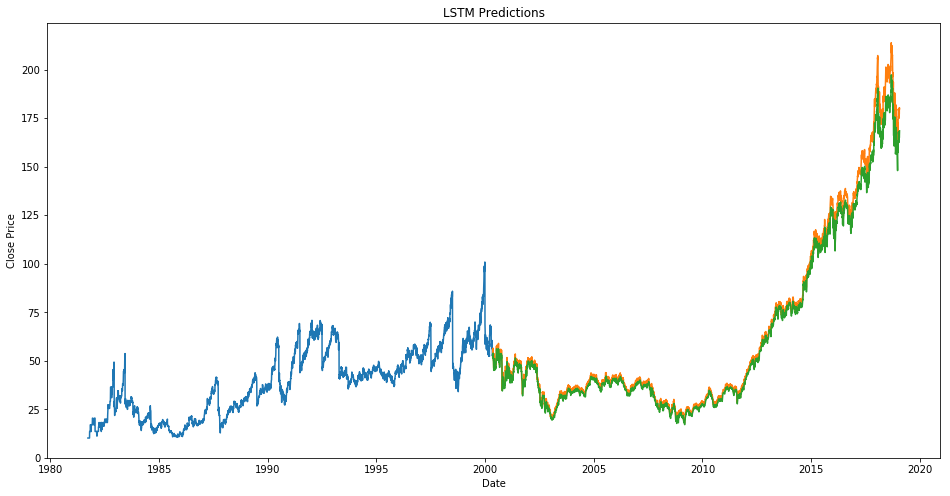

In [38]:
#plotting predictions
train = new_data[:4709]
valid = new_data[4709:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [1]:
## Linear Regression

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#creating features
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

In [ ]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

In [2]:
##ARIMA

In [ ]:
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])



In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms